In [2]:
import cv2 # default BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
img = cv2.imread('cat.jpg')

In [3]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [ ]:
cv2.imshow('image', img)

# waiting time, 0 = any key to close
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def cv_show(name, image):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [24]:
img.shape

(414, 500, 3)

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [ ]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
img

In [ ]:
img.shape

In [ ]:
cv2.imshow('image', img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
# Save
cv2.imwrite('mycat87.png', img)

In [ ]:
type(img)

In [ ]:
img.size

In [ ]:
img.dtype

## Load video

In [ ]:
vc = cv2.VideoCapture('test.mp4')

In [ ]:
# check if open correctly
if vc.isOpened(): 
    oepn, frame = vc.read()
else:
    open = False

In [ ]:
# 只要能打開 就讀每一禎數
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

## Region of Interest

In [ ]:
img=cv2.imread('cat.jpg')
cat=img[0:50,0:200] 
cv_show('cat',cat)

## Color Channel

In [ ]:
b,g,r=cv2.split(img)

In [ ]:
r

In [ ]:
r.shape

In [ ]:
img = cv2.merge((b,g,r))
img.shape

In [ ]:
# Only keep R channel
cur_img = img.copy()
cur_img[:,:,0] = 0 # all B = 0
cur_img[:,:,1] = 0 # all G = 0
cv_show('R',cur_img)

In [ ]:
# Only keep G channel
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [ ]:
# Only keep B channel
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

## 邊界填充

In [13]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)
constant2 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=50)

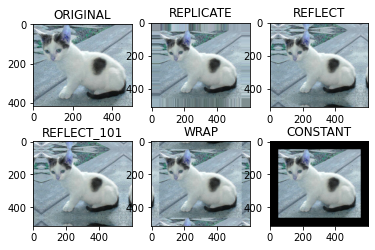

In [6]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

(<AxesSubplot:title={'center':'CONSTANT2'}>,
 Text(0.5, 1.0, 'CONSTANT2'))

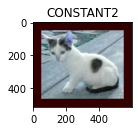

In [14]:
plt.subplot(236), plt.imshow(constant2, 'gray'), plt.title('CONSTANT2')

## Math

In [15]:
img_cat=cv2.imread('cat.jpg')
img_dog=cv2.imread('dog.jpg')

In [16]:
img_cat2= img_cat +10 
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [17]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], dtype=uint8)

In [18]:
# 294 % 256 = 38
(img_cat + img_cat2)[:5,:,0] 

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [19]:
cv2.add(img_cat,img_cat2)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Image + Image??

In [28]:
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (1242,500,3) 

In [29]:
img_cat.shape

(414, 500, 3)

In [30]:
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

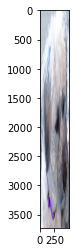

In [26]:
# res = cv2.resize(img_dog, (0, 0), fx=1, fy=3)
# plt.imshow(res)

In [31]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)

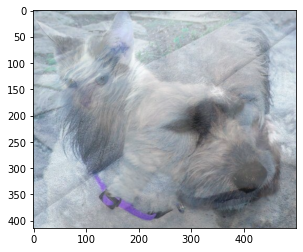

In [32]:
plt.imshow(res)

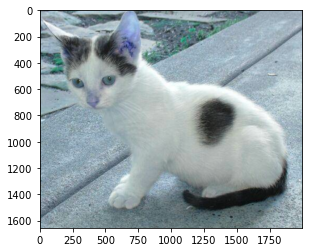

In [33]:
res = cv2.resize(img, (0, 0), fx=4, fy=4)
plt.imshow(res)

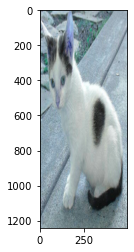

In [34]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)